In [1]:
!pip install xgboost lightgbm catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 6.9 MB/s eta 0:00:00


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from sklearn.model_selection import train_test_split, cross_val_predict, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, roc_auc_score, accuracy_score, f1_score, RocCurveDisplay
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import StackingClassifier
from xgboost import XGBClassifier

In [7]:
# Подготовка данных
df = pd.read_excel("/content/drive/MyDrive/Colab Notebooks/Лабы нейронки/data.xlsx")

df = df[["ХСН", "САД", "КСР", "QRS", "HCT", "PLT", "СКФ"]]
df = df.dropna()
df = df.to_numpy()

X = df[:, 1:]
y = df[:, 0]

# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Массив для сохранения метрик
metrics = []

ROC AUC: 1.0
Accuracy: 1.0
F1 Score: 1.0


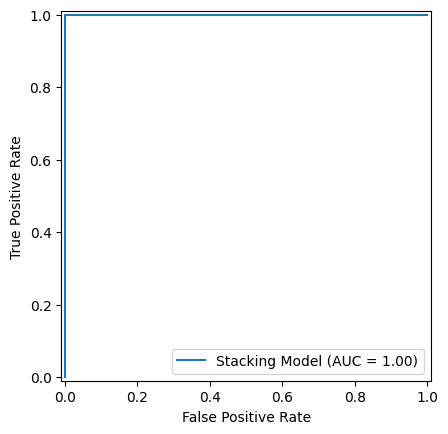

In [9]:
estimators = [
    ('knn', KNeighborsClassifier(n_neighbors=3)),
    ('nb', GaussianNB())
]
meta_model = StackingClassifier(
    estimators=estimators, final_estimator=LogisticRegression()
)
meta_model.fit(X_train, y_train)

# Предсказания мета-модели на тестовой выборке
y_pred_proba = meta_model.predict_proba(X_test)[:, 1]
y_pred = meta_model.predict(X_test)

# Построение ROC-кривой
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = roc_auc_score(y_test, y_pred_proba)

# Оценка модели
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f'ROC AUC: {roc_auc}')
print(f'Accuracy: {accuracy}')
print(f'F1 Score: {f1}')

metrics.append({
        'Model': 'Meta-model',
        'ROC AUC': roc_auc,
        'Accuracy': accuracy,
        'F1 Score': f1
    })

# Построение ROC-кривой
RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='Stacking Model').plot()


XGBoost Metrics:
ROC AUC: 1.0
Accuracy: 1.0
F1 Score: 1.0
--------------
LightGBM Metrics:
ROC AUC: 1.0
Accuracy: 1.0
F1 Score: 1.0
--------------
CatBoost Metrics:
ROC AUC: 1.0
Accuracy: 1.0
F1 Score: 1.0
--------------


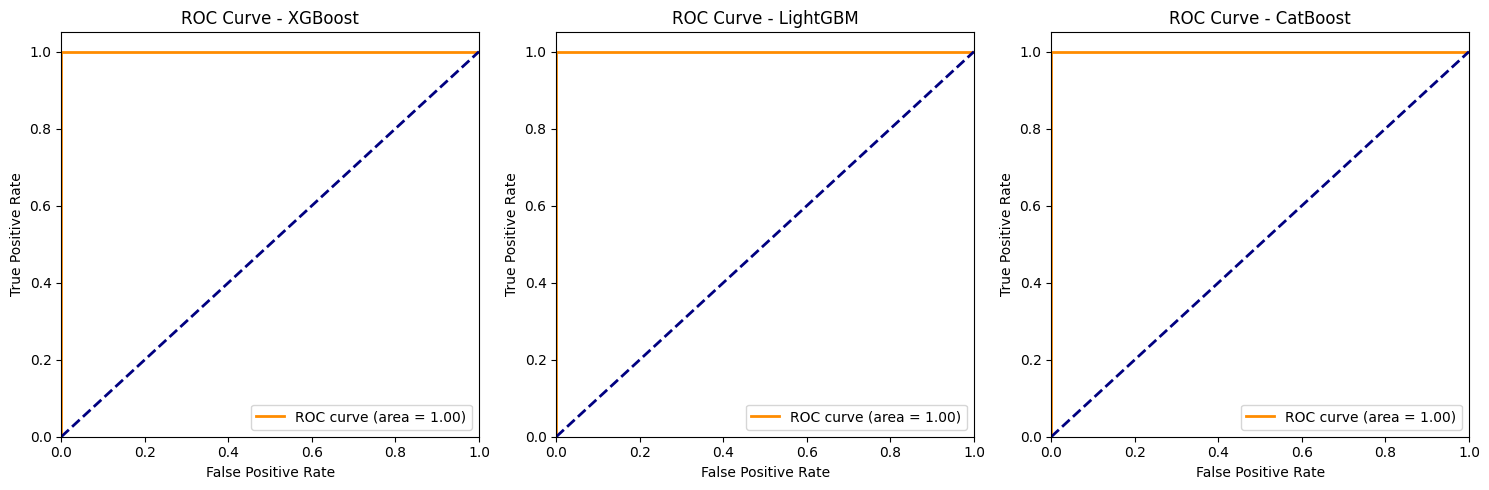

In [ ]:
# Обучение модели XGBoost
xgb_model = XGBClassifier(eval_metric='logloss')
xgb_model.fit(X_train, y_train)
y_pred_proba_xgb = xgb_model.predict_proba(X_test)[:, 1]
y_pred_xgb = xgb_model.predict(X_test)

# Обучение модели LightGBM с отключенным логированием
lgbm_model = LGBMClassifier(verbosity=-1)
lgbm_model.fit(X_train, y_train)
y_pred_proba_lgbm = lgbm_model.predict_proba(X_test)[:, 1]
y_pred_lgbm = lgbm_model.predict(X_test)

# Обучение модели CatBoost
catboost_model = CatBoostClassifier(verbose=0)
catboost_model.fit(X_train, y_train)
y_pred_proba_catboost = catboost_model.predict_proba(X_test)[:, 1]
y_pred_catboost = catboost_model.predict(X_test)

# Оценка моделей
models = {
    'XGBoost': (y_pred_proba_xgb, y_pred_xgb),
    'LightGBM': (y_pred_proba_lgbm, y_pred_lgbm),
    'CatBoost': (y_pred_proba_catboost, y_pred_catboost)
}

plt.figure(figsize=(15, 5))

for i, (model_name, (y_pred_proba, y_pred)) in enumerate(models.items(), 1):
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    roc_auc = roc_auc_score(y_test, y_pred_proba)
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    print(f'{model_name} Metrics:')
    print(f'ROC AUC: {roc_auc}')
    print(f'Accuracy: {accuracy}')
    print(f'F1 Score: {f1}')
    print('--------------')

    # Построение ROC-кривой
    plt.subplot(1, 3, i)
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve - {model_name}')
    plt.legend(loc="lower right")

plt.tight_layout()
plt.show()


XGBoost Metrics:
ROC AUC: 1.0
Accuracy: 1.0
F1 Score: 1.0
---------------------
LightGBM Metrics:
ROC AUC: 1.0
Accuracy: 1.0
F1 Score: 1.0
---------------------
CatBoost Metrics:
ROC AUC: 1.0
Accuracy: 1.0
F1 Score: 1.0
---------------------


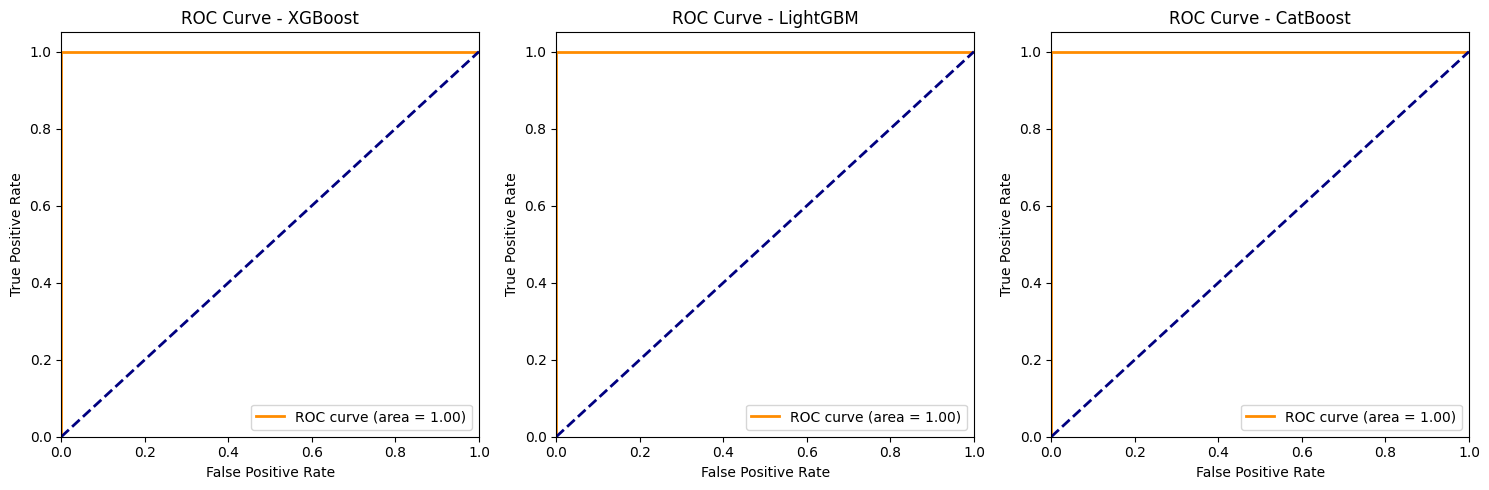

In [ ]:
# Подбор гиперпараметров для XGBoost
xgb_param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [3, 5, 7]
}
xgb_model = XGBClassifier(eval_metric='logloss')
xgb_grid_search = GridSearchCV(estimator=xgb_model, param_grid=xgb_param_grid, scoring='accuracy', cv=5)
xgb_grid_search.fit(X_train, y_train)
best_xgb_model = xgb_grid_search.best_estimator_

# Подбор гиперпараметров для LightGBM
lgbm_param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [3, 5, 7]
}
lgbm_model = LGBMClassifier(verbosity=-1)
lgbm_grid_search = GridSearchCV(estimator=lgbm_model, param_grid=lgbm_param_grid, scoring='accuracy', cv=5)
lgbm_grid_search.fit(X_train, y_train)
best_lgbm_model = lgbm_grid_search.best_estimator_

# Подбор гиперпараметров для CatBoost
catboost_param_grid = {
    'iterations': [50, 100, 150],
    'depth': [3, 5, 7]
}
catboost_model = CatBoostClassifier(verbose=0)
catboost_grid_search = GridSearchCV(estimator=catboost_model, param_grid=catboost_param_grid, scoring='accuracy', cv=5)
catboost_grid_search.fit(X_train, y_train)
best_catboost_model = catboost_grid_search.best_estimator_

# Оценка моделей
models = {
    'XGBoost': best_xgb_model,
    'LightGBM': best_lgbm_model,
    'CatBoost': best_catboost_model
}

plt.figure(figsize=(15, 5))

for i, (model_name, model) in enumerate(models.items(), 1):
    y_pred_proba = model.predict_proba(X_test)[:, 1]
    y_pred = model.predict(X_test)

    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    roc_auc = roc_auc_score(y_test, y_pred_proba)
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    metrics.append({
        'Model': model_name,
        'ROC AUC': roc_auc,
        'Accuracy': accuracy,
        'F1 Score': f1
    })

    print(f'{model_name} Metrics:')
    print(f'ROC AUC: {roc_auc}')
    print(f'Accuracy: {accuracy}')
    print(f'F1 Score: {f1}')
    print('---------------------')

    # Построение ROC-кривой
    plt.subplot(1, 3, i)
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve - {model_name}')
    plt.legend(loc="lower right")

plt.tight_layout()
plt.show()

In [ ]:
# Создание таблицы метрик
metrics_df = pd.DataFrame(metrics)
print("\nMetrics Table:")
print(metrics_df)


Metrics Table:
        Model  ROC AUC  Accuracy  F1 Score
0  Meta-model      1.0       1.0       1.0
1     XGBoost      1.0       1.0       1.0
2    LightGBM      1.0       1.0       1.0
3    CatBoost      1.0       1.0       1.0
